# Name- Mahak Agrawal, URN-191500432

#  Project Topic - Email Spam Classification

#  Email spam classification by using Supporting Vector Machine (SVM)

In [62]:
!pip install scikit-learn

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df=pd.read_csv('spam.csv', sep='\t')

In [65]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [66]:
len(df)

5572

In [67]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [68]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

#  Balance this data

In [69]:
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [70]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [71]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [72]:
ham=ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [73]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [74]:
data=ham.append(spam,ignore_index=True)
data

,label,message,length,punct
0,ham,I hope you arnt pissed off but id would really...,95,1
1,ham,"Storming msg: Wen u lift d phne, u say ""HELLO""...",324,38
2,ham,Then u better go sleep.. Dun disturb u liao.. ...,73,6
3,ham,Well there's a pattern emerging of my friends ...,220,5
4,ham,my ex-wife was not able to have kids. Do you w...,63,3
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


#  Exploratory Data Analysis

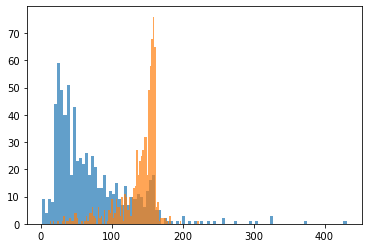

In [75]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

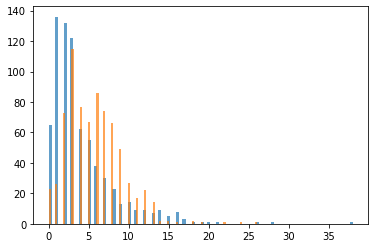

In [76]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

#  Data Preparation

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,shuffle=True,stratify=data['label'])

In [79]:
x_train.shape

(1045,)

In [80]:
y_train

996     spam
1333    spam
1008    spam
1383    spam
22       ham
        ... 
890     spam
829     spam
659      ham
1089    spam
255      ham
Name: label, Length: 1045, dtype: object

#  Bag of words Creation

In [81]:
vectorizer=TfidfVectorizer()

In [82]:
X_train=vectorizer.fit_transform(x_train)

In [83]:
x_train.shape

(1045,)

In [84]:
3900*7174

27978600

In [85]:
x_train

996     SMS AUCTION You have won a Nokia 7250i. This i...
1333    WELL DONE! Your 4* Costa Del Sol Holiday or £5...
1008    Would you like to see my XXX pics they are so ...
1383    Buy Space Invaders 4 a chance 2 win orig Arcad...
22      Tick, tick, tick .... Where are you ? I could ...
                              ...                        
890     January Male Sale! Hot Gay chat now cheaper, c...
829     our mobile number has won £5000, to claim call...
659                                Sorry, I'll call later
1089    Sppok up ur mob with a Halloween collection of...
255     Its not that time of the month nor mid of the ...
Name: message, Length: 1045, dtype: object

#  Pipeline and RF

In [86]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [87]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [88]:
y_pred=clf.predict(x_test)

In [89]:
confusion_matrix(y_test,y_pred)

array([[222,   2],
       [ 19, 206]], dtype=int64)

In [90]:
accuracy_score(y_test,y_pred)

0.9532293986636972

In [91]:
clf.predict(["Hy, How R U"])

array(['ham'], dtype=object)

In [92]:
clf.predict(["Lottery won of $100000"])

array(['ham'], dtype=object)

In [93]:
from sklearn.svm import SVC

In [94]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=1, gamma='auto'))])

In [95]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC(C=1, gamma='auto'))])

In [96]:
y_pred=clf.predict(x_test)

In [97]:
confusion_matrix(y_test,y_pred)

array([[224,   0],
       [225,   0]], dtype=int64)

#  Email spam classification by using Naive Bayes from sklearn

In [99]:
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [100]:
le = LabelEncoder()

In [101]:
data = df.to_numpy()

In [102]:
data

array([['ham',
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
        111, 9],
       ['ham', 'Ok lar... Joking wif u oni...', 29, 6],
       ['spam',
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
        155, 6],
       ...,
       ['ham',
        'Pity, * was in mood for that. So...any other suggestions?', 57,
        7],
       ['ham',
        "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
        125, 1],
       ['ham', 'Rofl. Its true to its name', 26, 1]], dtype=object)

In [103]:
X = data[:, 1]
y = data[:, 0]

In [104]:
X.shape, y.shape

((5572,), (5572,))

In [105]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
tokenizer = RegexpTokenizer('\w+')
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [107]:
def getStem(review):
    review = review.lower()
    tokens = tokenizer.tokenize(review) # breaking into small words
    removed_stopwords = [w for w in tokens if w not in sw]
    stemmed_words = [ps.stem(token) for token in removed_stopwords]
    clean_review = ' '.join(stemmed_words)
    return clean_review

In [108]:
# get a clean document
def getDoc(document):
    d = []
    for doc in document:
        d.append(getStem(doc))
    return d

In [109]:

stemmed_doc = getDoc(X)

In [110]:
stemmed_doc[:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030']

In [111]:
cv = CountVectorizer()

In [112]:
# create my vocab
vc = cv.fit_transform(stemmed_doc)

In [113]:
X = vc.todense()

In [114]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [115]:
from sklearn.naive_bayes import MultinomialNB

In [116]:
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9820554649265906

In [117]:
messages = [
    """
Dear all,

We are pleased to inform you that Circuitminia Club is organizing a workshop on  "Interaction about inverter used in real-life applications" to be held on 26th July 2021 (online) at 2 PM.
You are invited to join the shame. 
 """,
    """
Class Room91 is inviting you to a scheduled Zoom meeting.

Topic: Workshop on Interaction about inverter used in real-life applications 
  """
]


In [118]:
def prepare(messages):
    d = getDoc(messages)
    # dont do fit_transform!! it will create new vocab.
    return cv.transform(d)

messages = prepare(messages)

In [119]:
y_pred = model.predict(messages)
y_pred

array(['ham', 'ham'], dtype='<U4')

# Email spam classification by using Decision Tree 

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [188]:
df.keys()

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [201]:
data = df.to_numpy()

In [212]:
data

array([['ham',
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
        111, 9],
       ['ham', 'Ok lar... Joking wif u oni...', 29, 6],
       ['spam',
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
        155, 6],
       ...,
       ['ham',
        'Pity, * was in mood for that. So...any other suggestions?', 57,
        7],
       ['ham',
        "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
        125, 1],
       ['ham', 'Rofl. Its true to its name', 26, 1]], dtype=object)

In [221]:
X = data[:, 1]
y = data[:, 0]
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

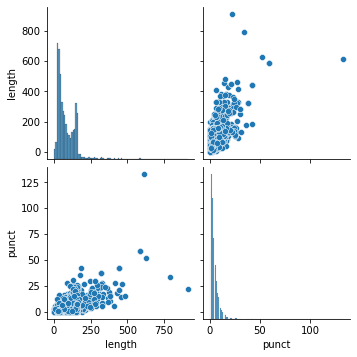

In [204]:
sns.pairplot(df)

In [222]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,stratify=y)

In [223]:
clf=DecisionTreeClassifier(criterion='gini',random_state=1)

In [ ]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

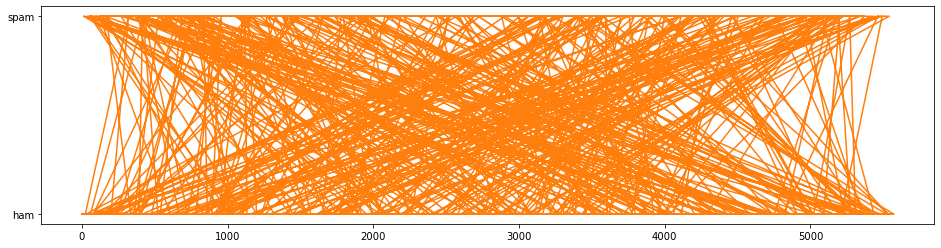

In [69]:
plt.figure(figsize=(16,4))
plt.plot(y_pred)
plt.plot(y_test)